2022-11-25 16:34:03.648937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 16:34:03.793017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 16:34:03.793036: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-25 16:34:03.825229: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-25 16:34:04.454242: W tensorflow/stream_executor/platform/de

img shape
(640, 640, 3)


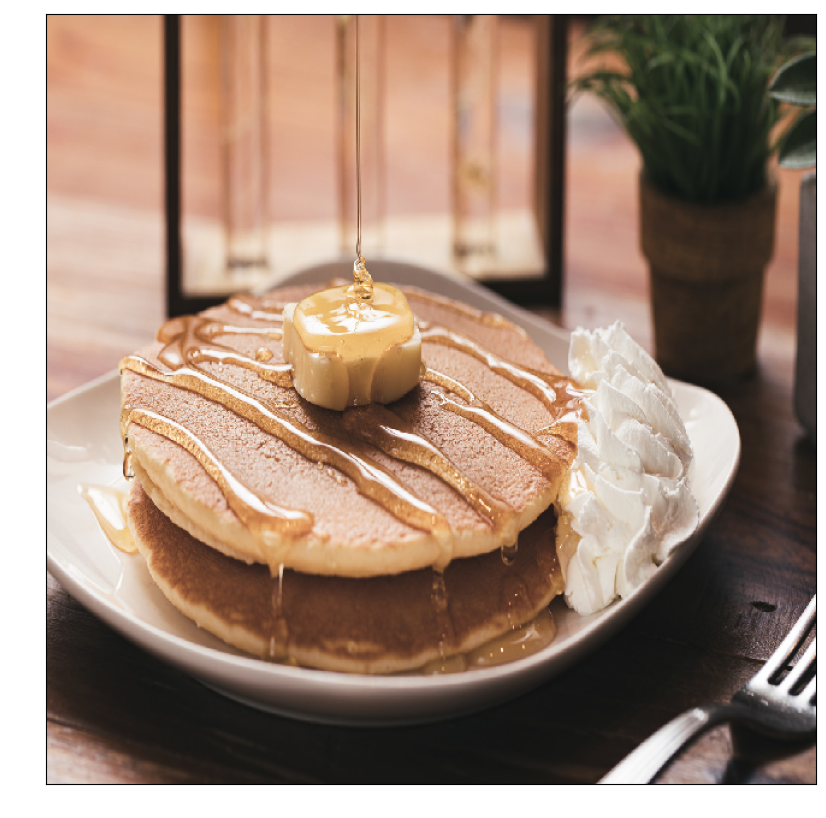

In [1]:

import keras.utils.image_utils as image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import array_to_img


#アップロードされた画像を読み込み
img = image.load_img("../../pancake.jpg", target_size=(640, 640))
#画像をnumpy配列に変換する
img = np.array(img)
print("img shape")
print(img.shape)
#表示画像のサイズを設定
plt.figure(figsize = (10, 10))
#軸を表示しない
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
#表示
plt.imshow(img)

In [2]:
#画像表示用の関数を定義
def show(datagen, img):
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = 0)):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    plt.subplot(2, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    #6回目で繰り返しを強制的に終了
    if i == 5:
      return

In [3]:
#パンケーキの画像配列の形
print(img.shape)
#配列に次元を追加
img_cake=img[np.newaxis, :, :, :]
#次元追加後の配列の形
print(img_cake.shape)

(640, 640, 3)
(1, 640, 640, 3)


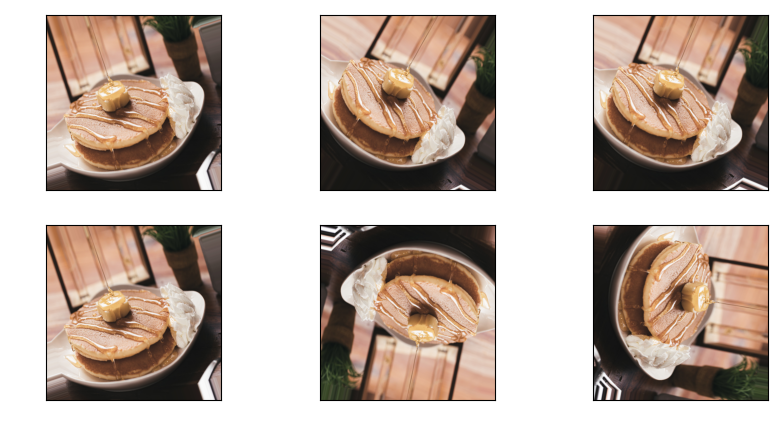

In [4]:
#-180度〜+180度の間でランダムに回転するImageDataGeneratorを作成
rotation_datagen = ImageDataGenerator(rotation_range = 180)
#画像を表示
show(rotation_datagen, img_cake)

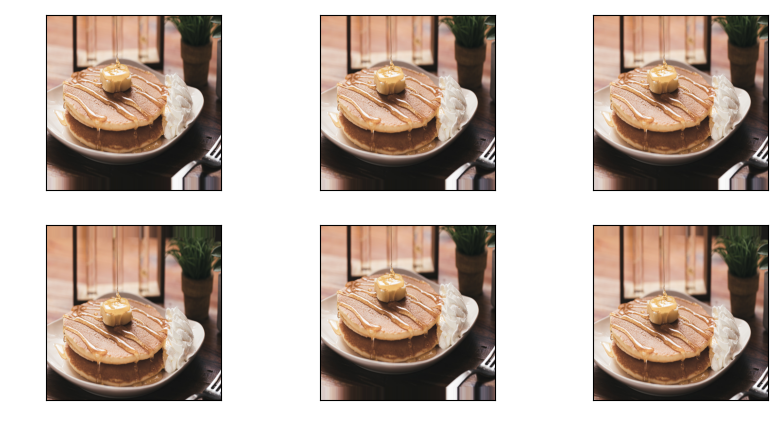

In [5]:
#指定されたピクセル（-50〜+50）の範囲で左右にランダム
width_datagen = ImageDataGenerator(width_shift_range = 50)
show(width_datagen, img_cake)

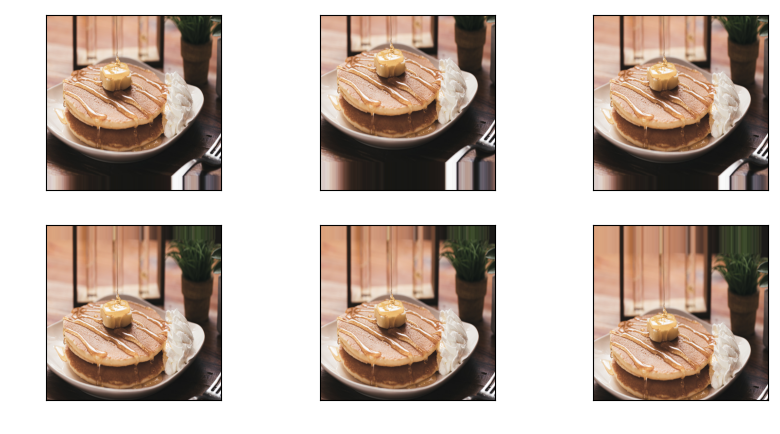

In [6]:
# 指定されたピクセル（-100,-50,+50,+100）の内、左右にランダムに動かします。
width_datagen = ImageDataGenerator(width_shift_range = [50,100])
show(width_datagen, img_cake)

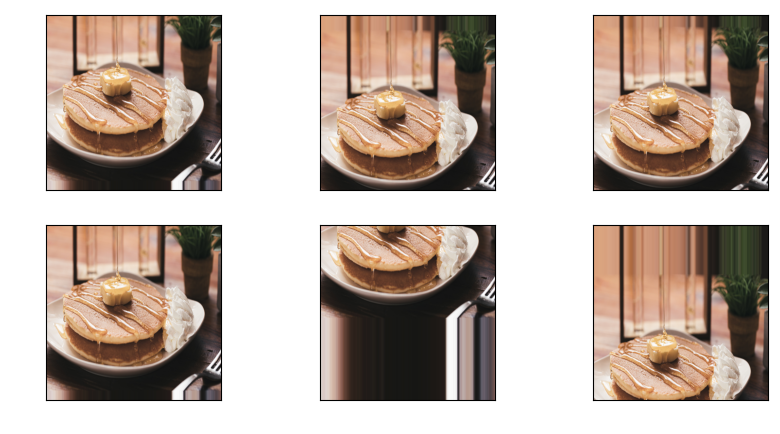

In [7]:
#-320〜+320の間でランダムに左右平行移動するImageDataGeneratorを作成
width_datagen = ImageDataGenerator(width_shift_range = 0.5)
show(width_datagen, img_cake)

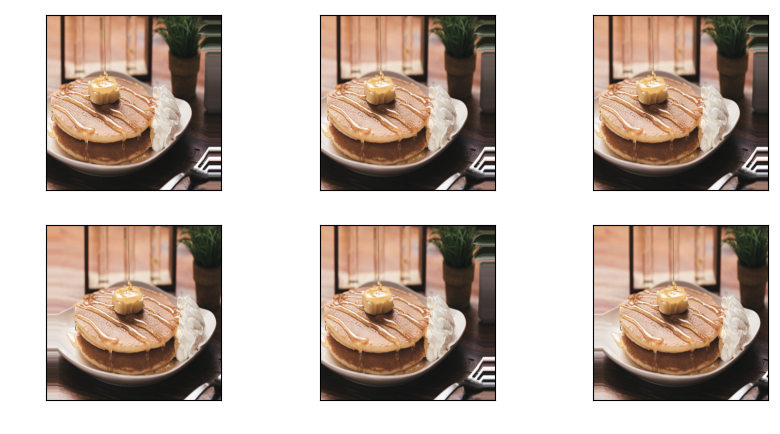

In [8]:
# 指定されたピクセル（-50〜+50）の範囲で上下にランダムに動かします。
height_datagen = ImageDataGenerator(height_shift_range = 50)
show(height_datagen, img_cake)

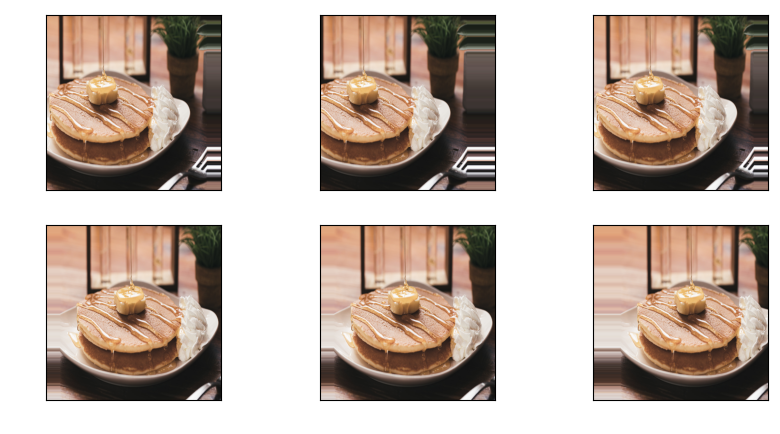

In [9]:
# 指定されたピクセル（-100,-50,+50,+100）の内、上下にランダムに動かします。
height_datagen = ImageDataGenerator(height_shift_range = [50,100])
show(height_datagen, img_cake)

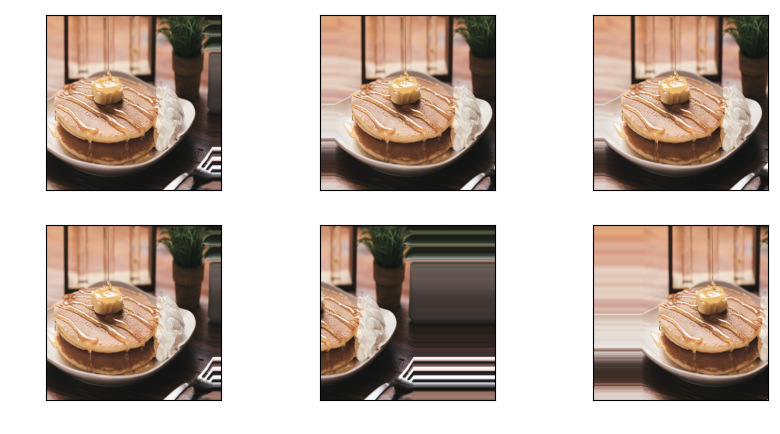

In [10]:
#-320〜+320の間でランダムに上下平行移動するImageDataGeneratorを作成
height_datagen = ImageDataGenerator(height_shift_range = 0.5)
show(height_datagen, img_cake)

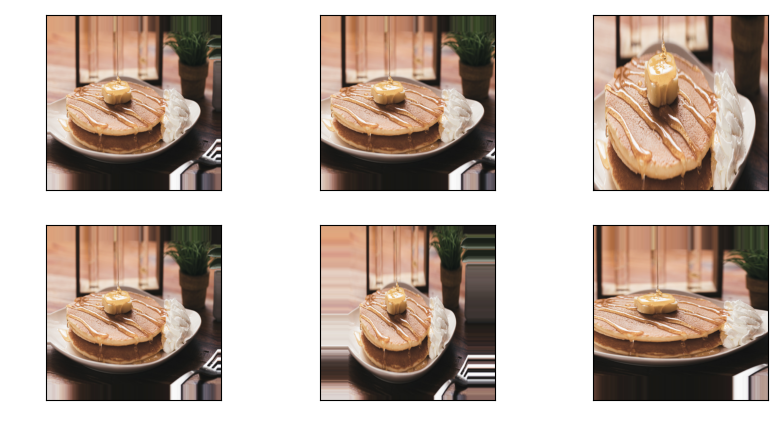

In [11]:
#0.5〜1.5の間でランダムに拡大又は縮小するImageDataGeneratorを作成
zoom_datagen = ImageDataGenerator(zoom_range = [0.5, 1.5])
show(zoom_datagen, img_cake)

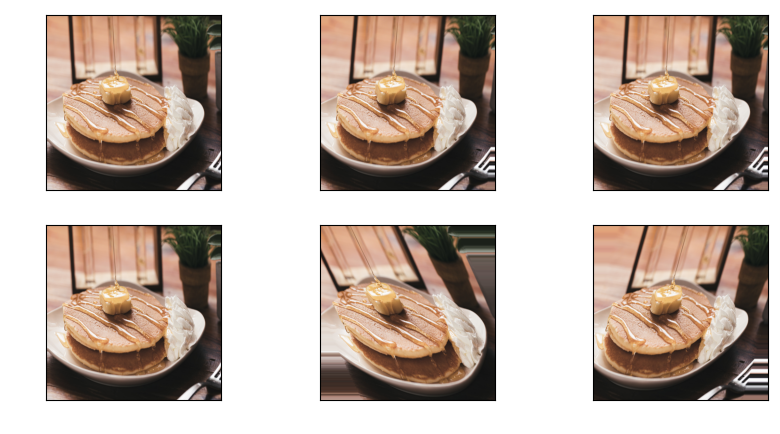

In [12]:
#30度の範囲でランダムにせん断するImageDataGeneratorを作成
shear_datagen = ImageDataGenerator(shear_range = 30)
show(shear_datagen, img_cake)

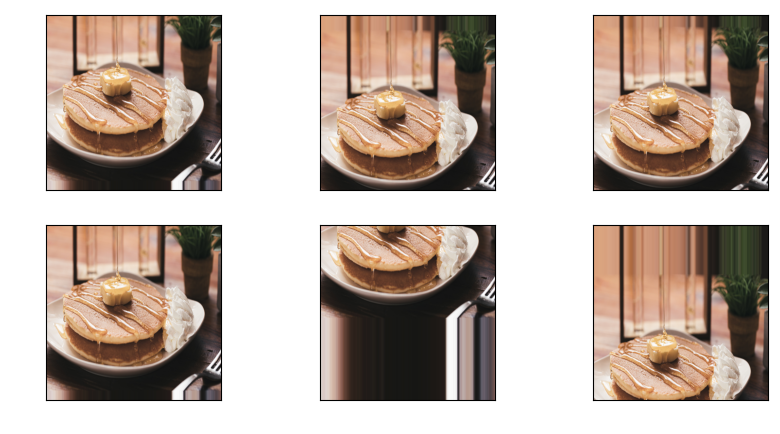

In [13]:
#nearestで補間するImageDataGeneratorを作成
nearest_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "nearest")
show(nearest_datagen, img_cake)

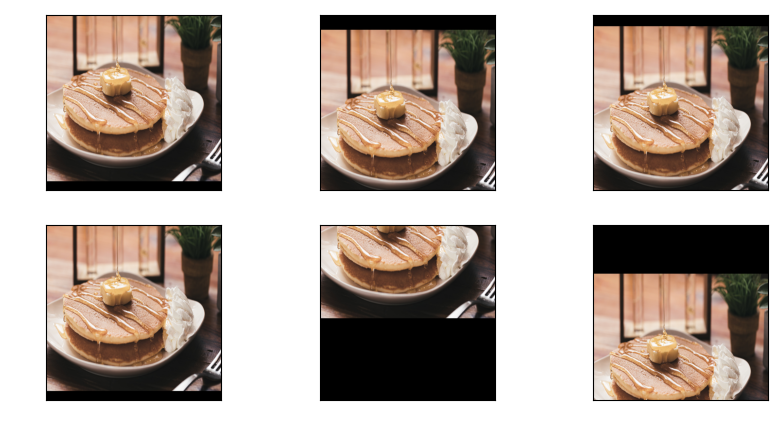

In [14]:
#constantで補間するImageDataGeneratorを作成
constant_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "constant", cval = 0)
show(constant_datagen, img_cake)

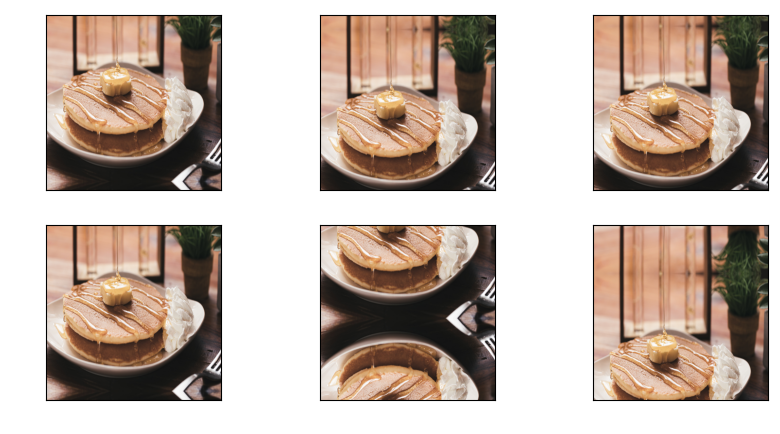

In [15]:
#reflctで補間するImageDataGeneratorを作成
reflect_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "reflect")
show(reflect_datagen, img_cake)

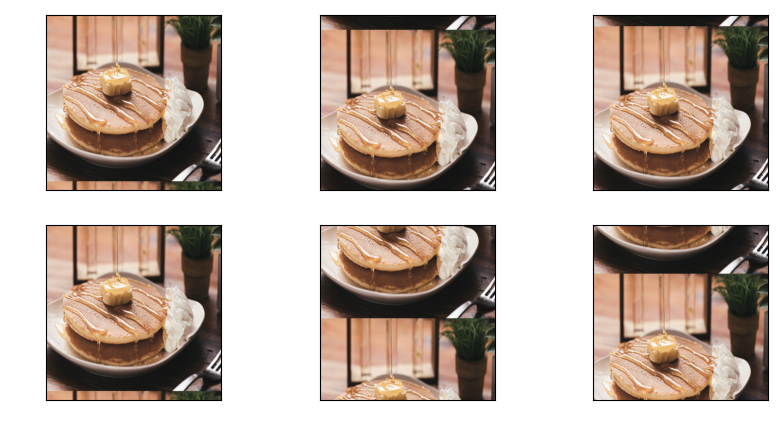

In [16]:
#wrapで補間するImageDataGeneratorを作成
wrap_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "wrap")
show(wrap_datagen, img_cake)

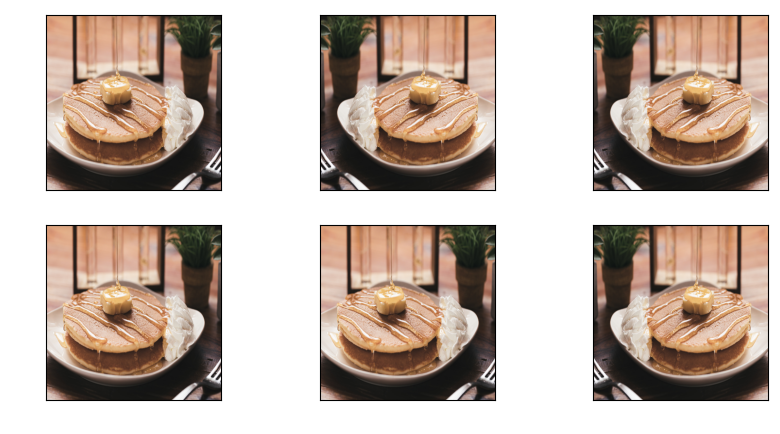

In [17]:
#ランダムに画像を左右反転するImageDataGeneratorを作成
horizontal_datagen = ImageDataGenerator(horizontal_flip = True)
show(horizontal_datagen, img_cake)

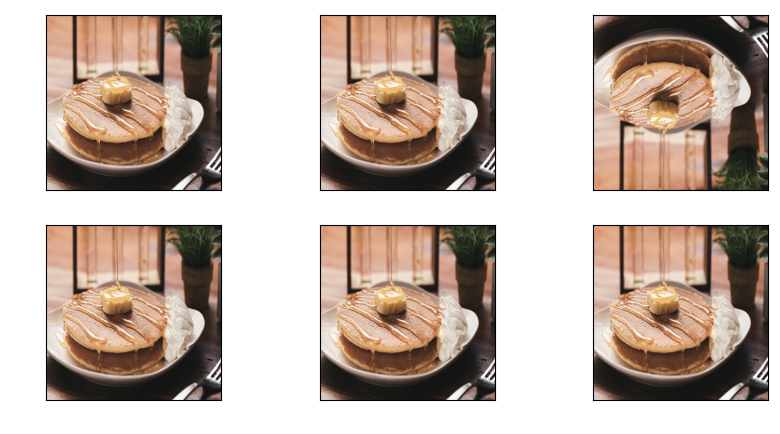

In [18]:
#ランダムに画像を上下反転するImageDataGeneratorを作成
vertical_datagen = ImageDataGenerator(vertical_flip = True)
show(vertical_datagen, img_cake)

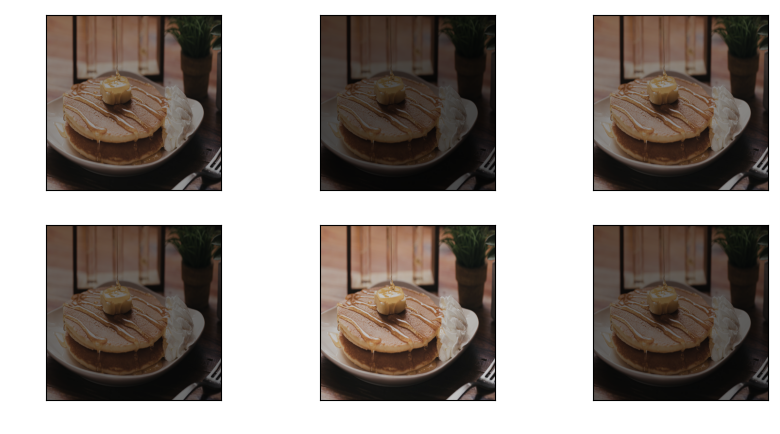

In [19]:
#画像の明るさを0.3〜0.8の間で調整（暗くする）
brightness_datagen = ImageDataGenerator(brightness_range = [0.3, 0.8])
show(brightness_datagen, img_cake)

In [20]:
print("画像破裂の形は"+str(img_cake.shape))
print("1ブロックのチャンネルの値は"+str(img_cake[0][0][0]))

画像破裂の形は(1, 640, 640, 3)
1ブロックのチャンネルの値は[221 163 125]


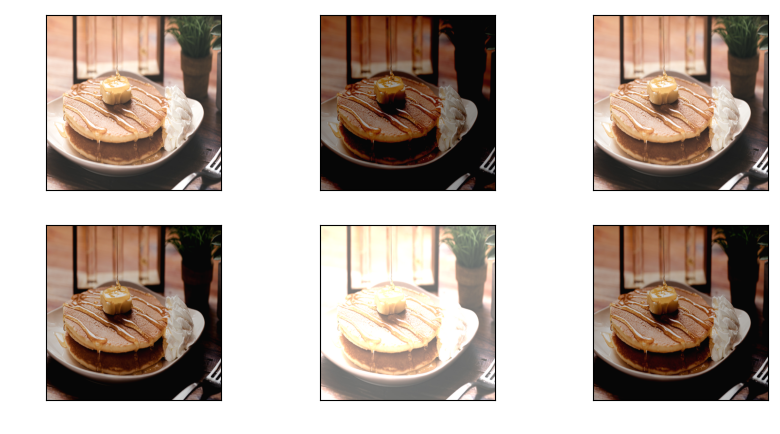

In [21]:
#-100〜100の間でランダムにチャンネルシフトするImageDataGeneratorを作成
channel_datagen = ImageDataGenerator(channel_shift_range = 100)
show(channel_datagen, img_cake)

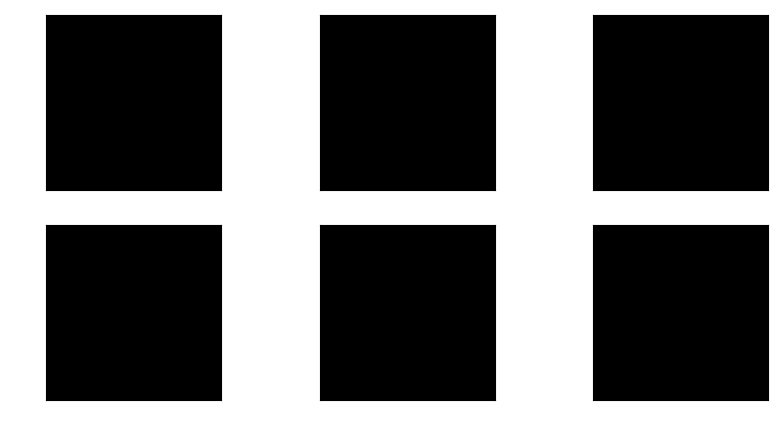

In [22]:
#各画素値を0〜1に収めるImageDataGeneratorを作成
rescale_datagen = ImageDataGenerator(rescale = 1./255)
show(rescale_datagen, img_cake)

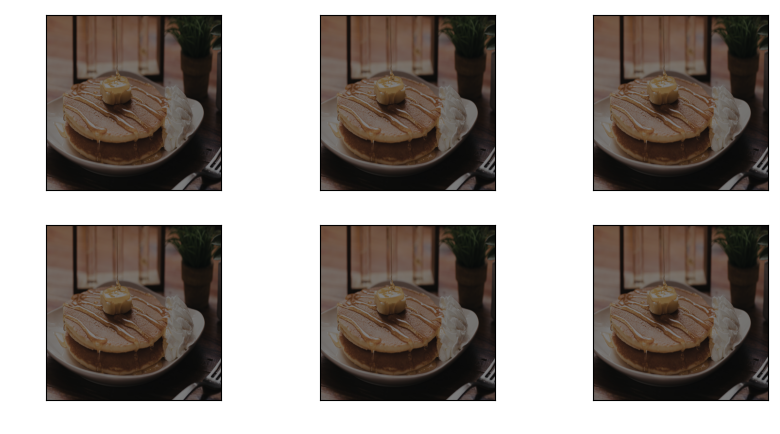

In [23]:
rescale_datagen = ImageDataGenerator(rescale = 127.5/255)
show(rescale_datagen, img_cake)

In [24]:
featurewise_datagen = ImageDataGenerator(featurewise_center = True)
featurewise_datagen.fit(img_cake, seed = 0)
for i, data in enumerate(featurewise_datagen.flow(img_cake, batch_size = 1)):
    print(np.mean(data[0]))
    if i == 0:
        break

-0.009737091


In [25]:
#各サンプル毎の平均を0にするImageDataGeneratorクラスを作成
samplewise_datagen = ImageDataGenerator(samplewise_center = True)
featurewise_datagen.fit(img_cake, seed = 0)
for i, data in enumerate(samplewise_datagen.flow(img_cake, batch_size = 1)):
  print(np.mean(data[0]))
  if i == 0:
    break

3.5959878e-05


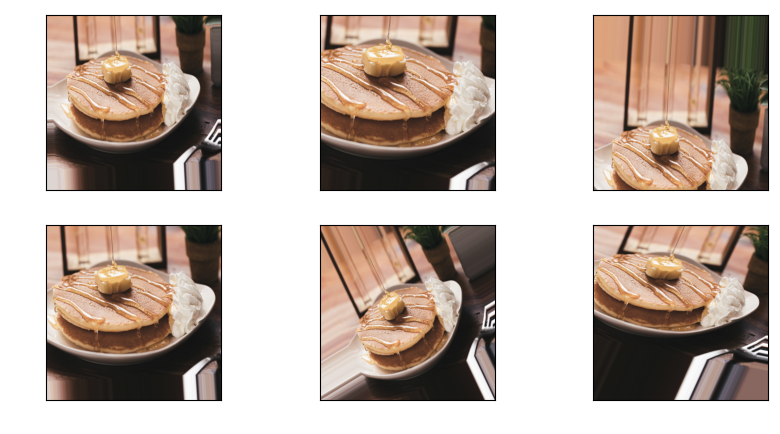

In [26]:
#複数の変換を適用するImageDataGeneratorクラスを作成
double_datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.3, zoom_range = 0.3)
show(double_datagen, img_cake)

# まんま写経してみる。今度は×画像(close)で。

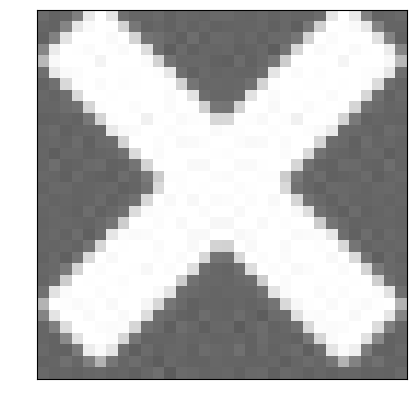

In [27]:
#アップロードされた画像を読み込み
#img = image.load_img("../../close1.jpg", target_size=(32, 32))
img = image.load_img("../../close1.jpg")
#画像をnumpy配列に変換する
img = np.array(img)
#表示画像のサイズを設定
#plt.figure(figsize = (32, 32))
#軸を表示しない
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
#表示
plt.imshow(img)

In [28]:
#パンケーキの画像配列の形
print(img.shape)
#配列に次元を追加
img_cake=img[np.newaxis, :, :, :]
#次元追加後の配列の形
print(img_cake.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [29]:
#画像表示用の関数を定義
#といいながら、生成した画像データを保存したり、いろいろと下処理をしてしまう。。。
glb_count = 0
def show2(datagen, img):
  global glb_count
  print("===show2", glb_count)
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = 0)):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    #plt.subplot(2, 3, i+1)
    plt.subplot(33, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    
    #データのセーブ処理
    #まずはベースとなる416 x 416画像を作る。背景は白(255,255,255)
    base = np.full((416, 416,3), 255)
    base[0:32,0:32] = data[0][0:32,0:32]
    save_img = array_to_img(base, scale = False)
    image.save_img(str(glb_count) + ".jpg", save_img)
    glb_count += 1
    
    #6回目で繰り返しを強制的に終了
#    if i == 5:
    if i == 98:
      return

===show2 0


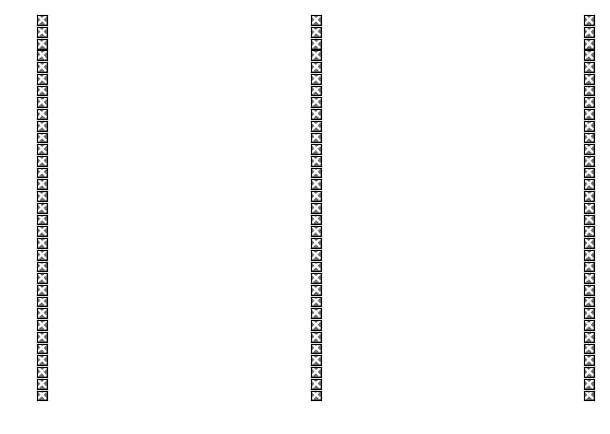

In [30]:
#-180度〜+180度の間でランダムに回転するImageDataGeneratorを作成
#rotation_datagen = ImageDataGenerator(rotation_range = 180)
rotation_datagen = ImageDataGenerator(rotation_range = 5)
#画像を表示
show2(rotation_datagen, img_cake)

In [31]:
#指定されたピクセル（-50〜+50）の範囲で左右にランダム
#このパターンの画像はtrain/validに含めては行けない。かなり崩れた画像担っているため。
#width_datagen = ImageDataGenerator(width_shift_range = 32)
#show2(width_datagen, img_cake)

===show2 99


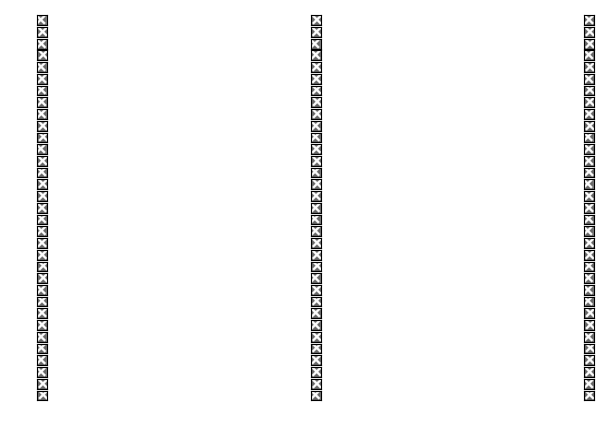

In [32]:
# 指定されたピクセル（-50〜+50）の範囲で上下にランダムに動かします。
#height_datagen = ImageDataGenerator(height_shift_range = 10)
#引数が10だと若干動かし過ぎ感がある
#以下は、補完時に何も指定していない
#height_datagen = ImageDataGenerator(height_shift_range = 5)
height_datagen = ImageDataGenerator(height_shift_range = 5,fill_mode="constant", cval=125)
show2(height_datagen, img_cake)

===show2 198


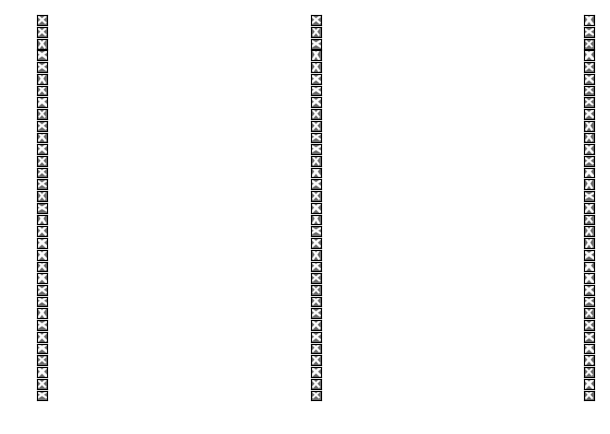

In [33]:
#0.5〜1.5の間でランダムに拡大又は縮小するImageDataGeneratorを作成
zoom_datagen = ImageDataGenerator(zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(zoom_datagen, img_cake)

===show2 297


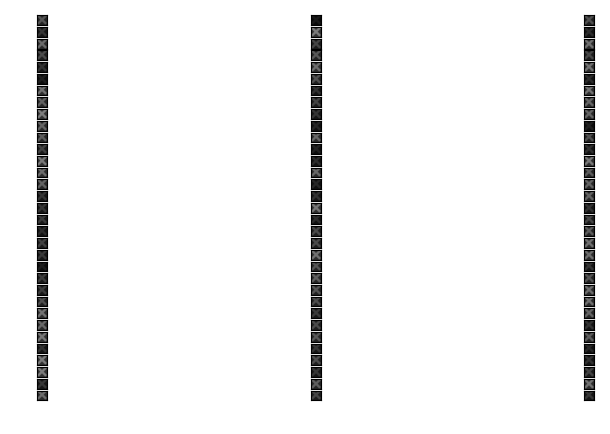

In [34]:
#画像の明るさを0.3〜0.8の間で調整（暗くする）
brightness_datagen = ImageDataGenerator(brightness_range = [0.1, 0.5])
show2(brightness_datagen, img_cake)

===show2 396
===show2 495
===show2 594
===show2 693
===show2 792
===show2 891


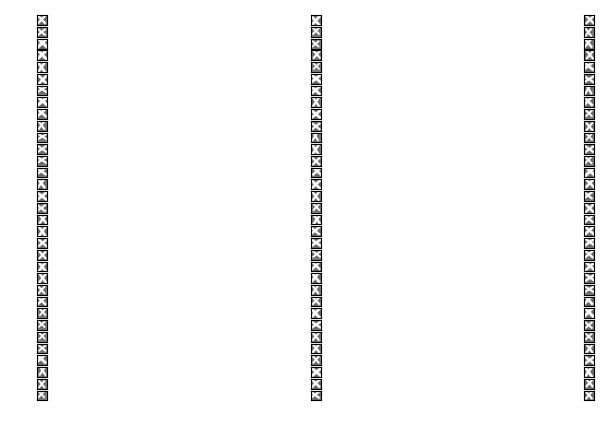

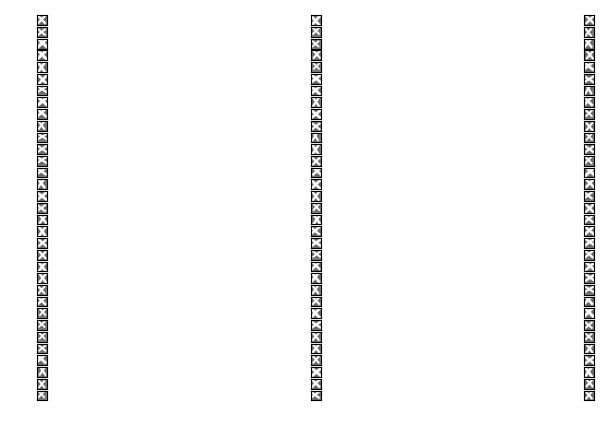

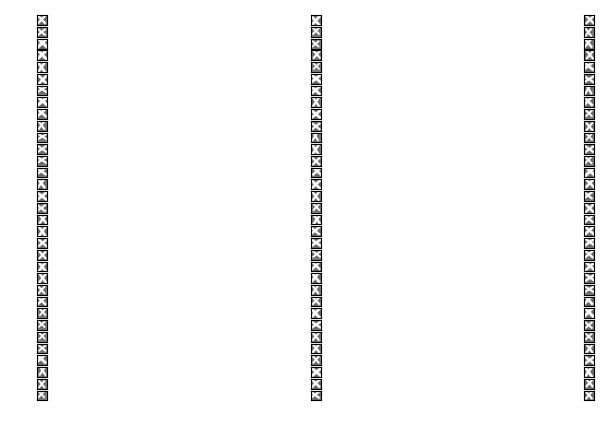

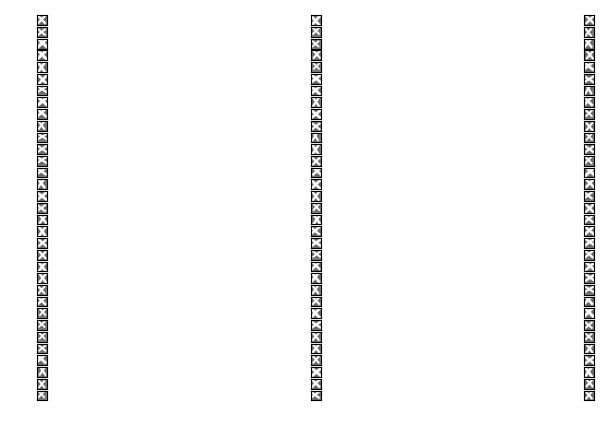

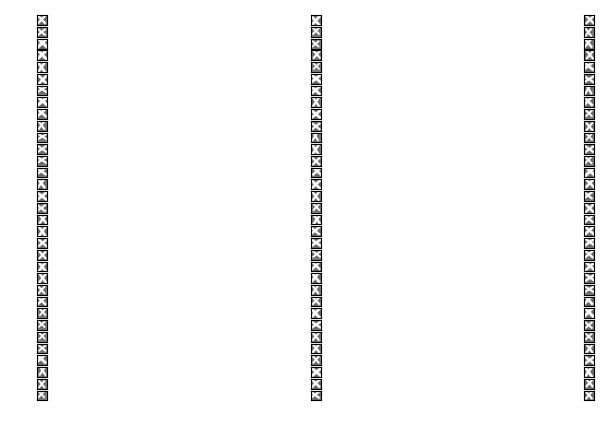

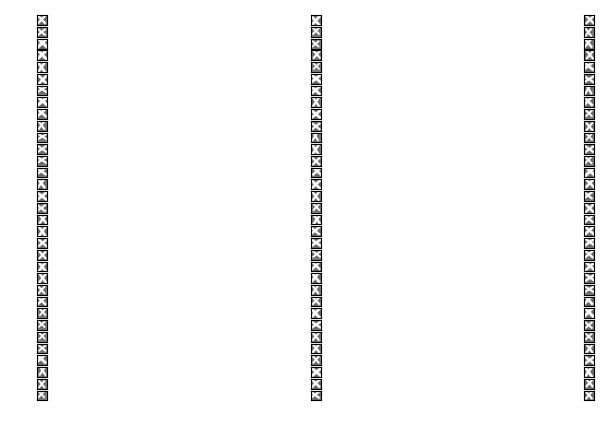

In [35]:
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)